#### 1) import the datafile from [UCI repo](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [8]:
import pandas as pd
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#### 2) Check the presence of null values, shape of the data and datatypes of the attributes

In [9]:
df.shape

(195, 24)

In [10]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [11]:
df.isnull().count()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      195
MDVP:Jitter(Abs)    195
MDVP:RAP            195
MDVP:PPQ            195
Jitter:DDP          195
MDVP:Shimmer        195
MDVP:Shimmer(dB)    195
Shimmer:APQ3        195
Shimmer:APQ5        195
MDVP:APQ            195
Shimmer:DDA         195
NHR                 195
HNR                 195
status              195
RPDE                195
DFA                 195
spread1             195
spread2             195
D2                  195
PPE                 195
dtype: int64

#### 3) Find the class distribution of the dataset

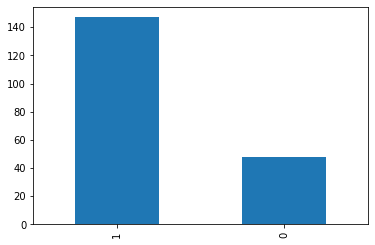

In [12]:
df.status.value_counts().plot(kind = 'bar')
plt.show()

In [15]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### 6) Display a pairplot and use the Class variable to color the data points

C:\Users\dsharma\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dsharma\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


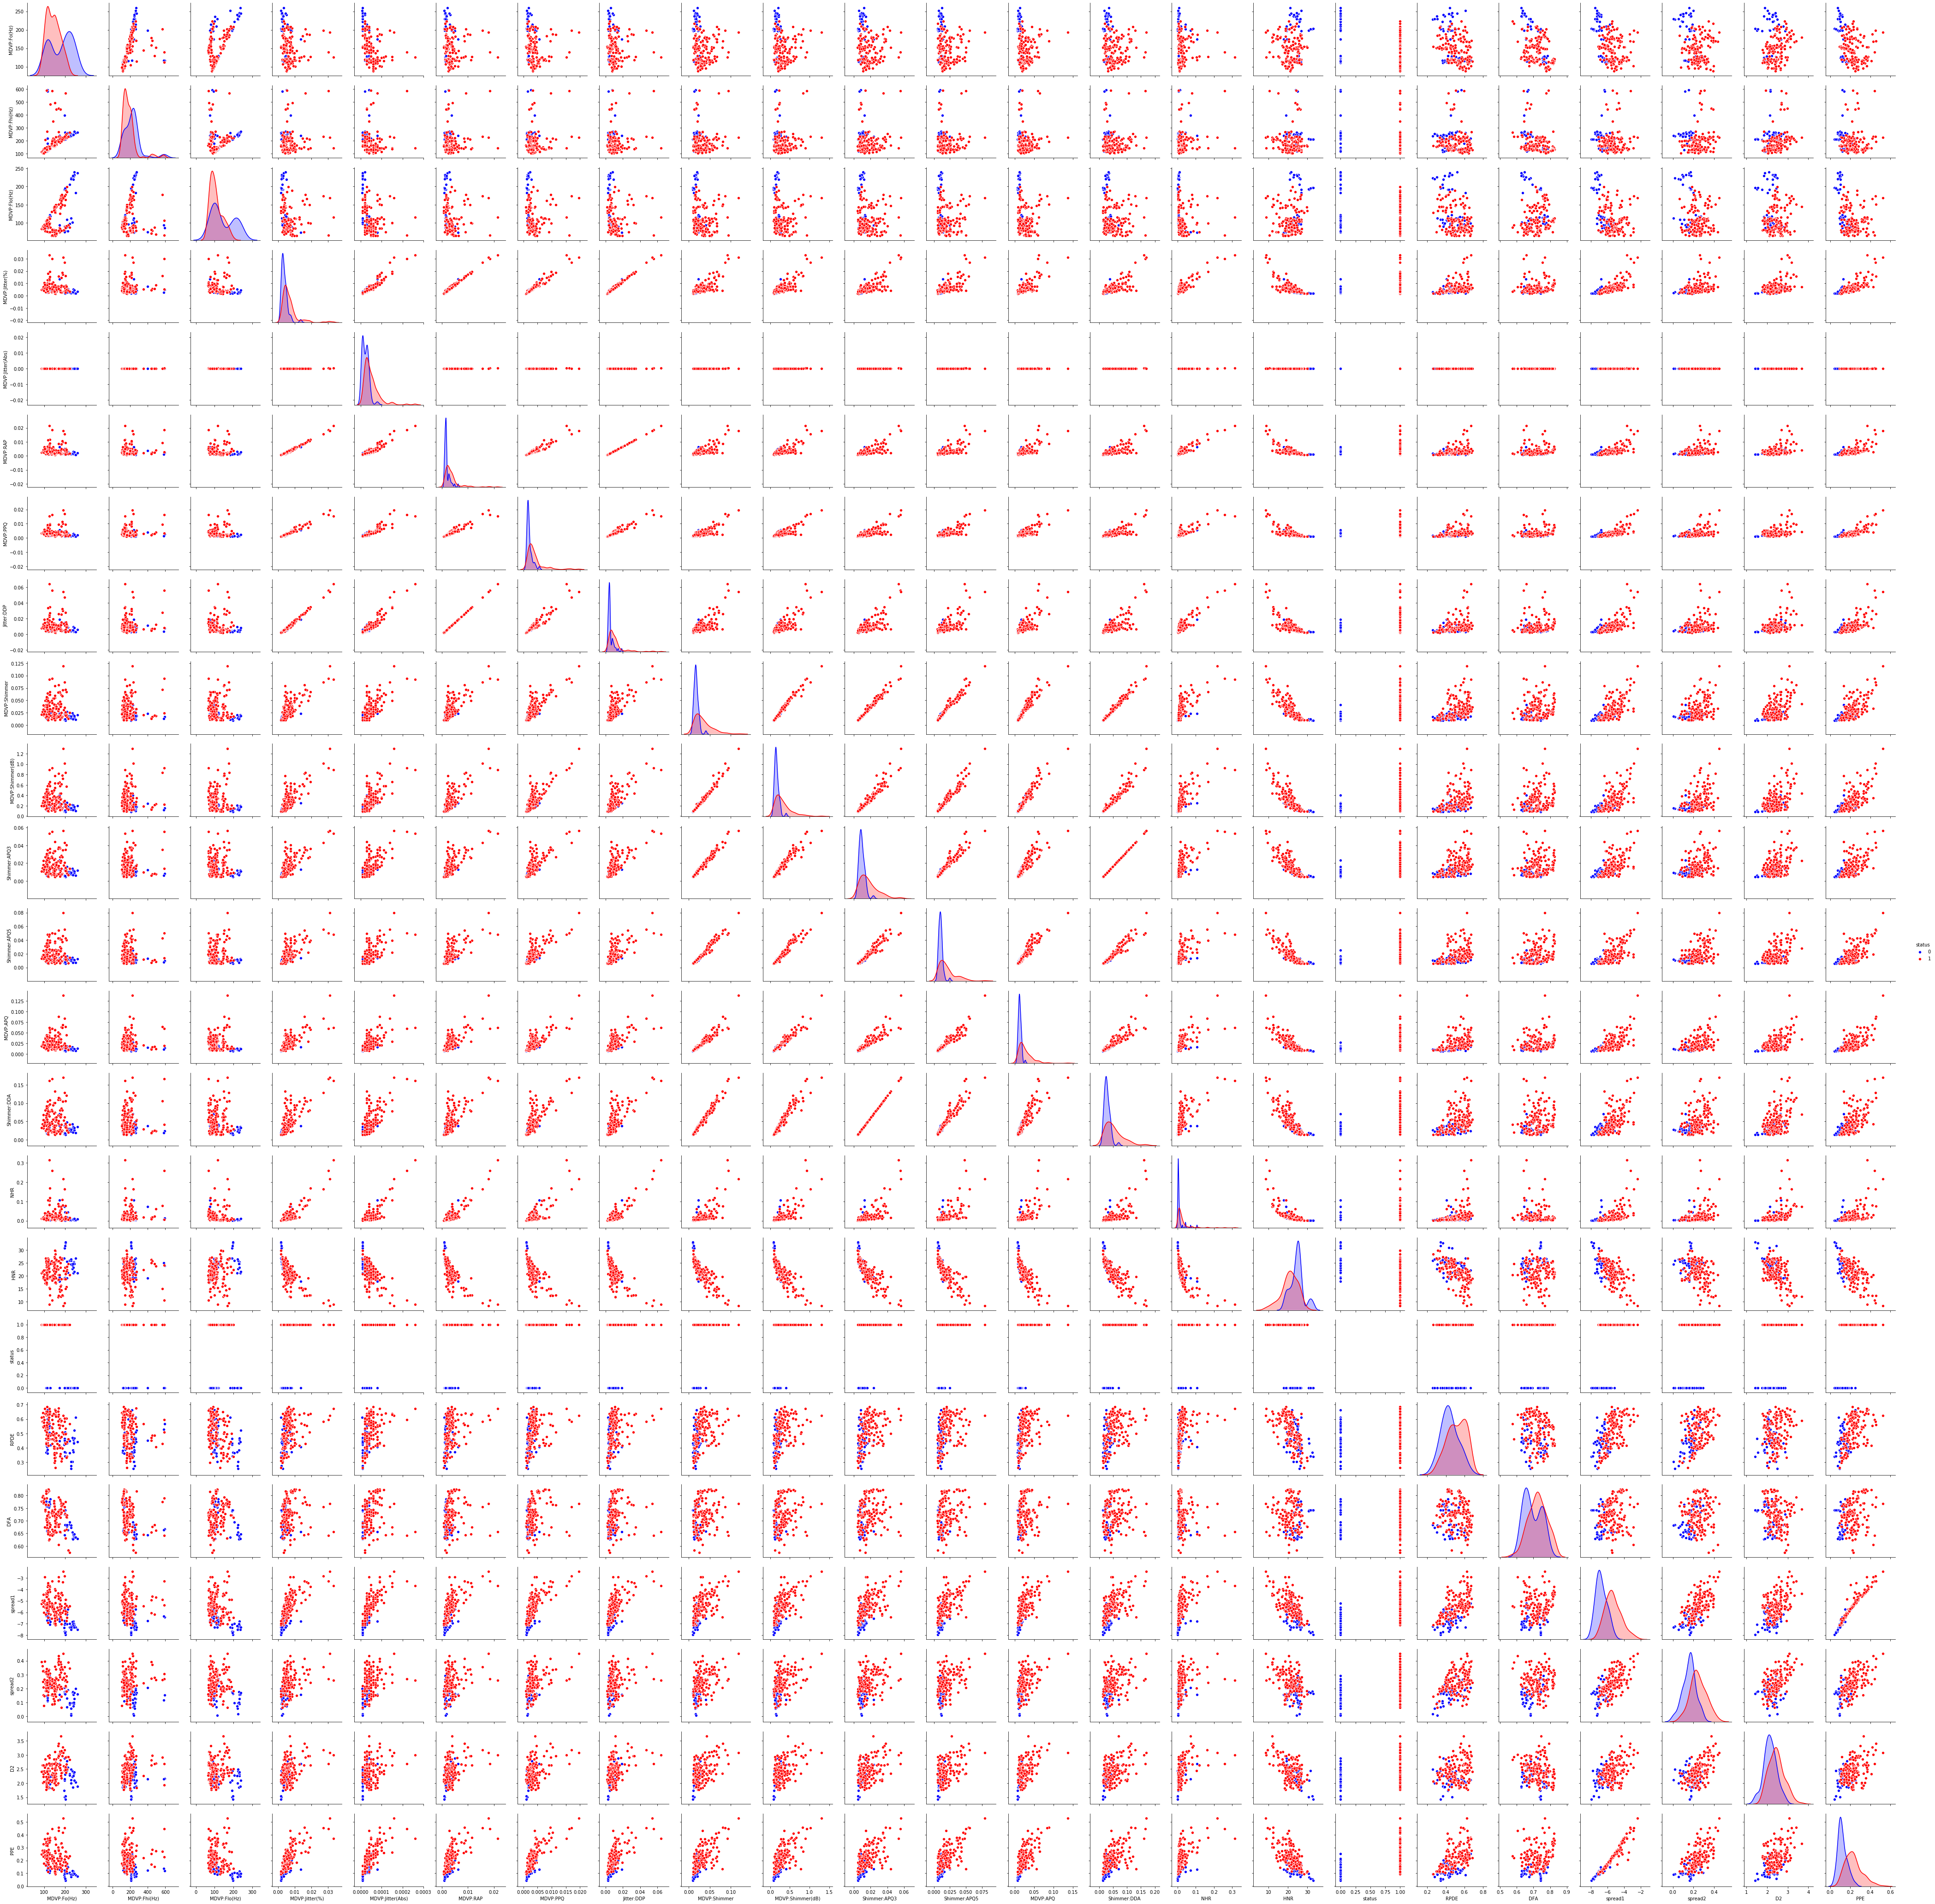

In [18]:
sns.pairplot(df, hue = 'status', diag_kind= 'kde', palette = ['blue', 'red'])
plt.show()

#### 8) Seperate the 'Class' variable from the others   (i.e, Dependant and independant)

In [30]:
X = df.drop('status', axis=1)
X = X.drop('name', axis=1)
y = df[['status']]

#### 9) Split the data into train and test sets

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [38]:
# Import decision tree
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(criterion='entropy')
Decision_Tree.fit(X_train, y_train)
Result_Decision_Tree = Decision_Tree.score(X_test,y_test)
print(Result_Decision_Tree)

0.847457627118644


In [39]:
y_predict = Decision_Tree.predict(X_test)

In [52]:
#pd.crosstab(X['status'], y_predict, rownames=['actual'], colnames=['estimate'])

In [42]:
# Regularization
Reg_Decision_Tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5)
Reg_Decision_Tree.fit(X_train, y_train)
Reg_Result_Decision_Tree = Reg_Decision_Tree.score(X_test,y_test)
print(Reg_Result_Decision_Tree)

0.9152542372881356


In [43]:
# Model score clears threshhold of 90%

In [45]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train,y_train)
Result_Random_Forest = Random_Forest.score(X_test,y_test)
print(Result_Random_Forest)


0.8135593220338984


C:\Users\dsharma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dsharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
